In [103]:
import pandas as pd
from sklearn import tree

# 1. Mantiksal kapilar

Asagidaki mantiksal kapilari modelleyebilecek karar agaclarini egitiniz.

## 1.a. AND Gate

`AND` kapisinin dogruluk tablosu icin [bu adresteki](https://en.wikipedia.org/wiki/AND_gate) bilgiye bakabilirsiniz.

### 1.a.I



AND dogruluk tablosunu `pandas.DataFrame` olarak tanimlayiniz.



| $x_1$ | $x_2$ | $y$ |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

In [104]:
#AND dogruluk tablosunu `pandas.DataFrame` olarak tanimlayalim.
import pandas as pd
and_tablosu = pd.DataFrame([[0,0,0],[0,1,0],[1,0,0],[1,1,1]], columns=['x1','x2','y'])
and_tablosu

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


### 1.a.II

Tanimlamis oldugunuz dogruluk tablosunu kullanarak ve uygun karar agaci modelini secerek (regresyon/tasniflendirme) karar agacinizi egitiniz.

In [105]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [106]:
#bagimsiz degisken
X = and_tablosu[['x1','x2']]
#hedef degisken
y = and_tablosu['y']
#Karar agaci modelini olusturalim ve egitelim.
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

- Bu kod, and_tablosu veri çerçevesini kullanarak bir karar ağacı sınıflandırma modeli oluşturur ve eğitir. Ardından, belirli bir girişe (örneğin [1, 0]) dayanarak tahmin yapar ve sonucu yazdırır.

- Not: Bu örnek, AND doğruluk tablosu üzerinde bir karar ağacı modeli eğitmek için basit bir örnektir. Gerçek dünyadaki daha karmaşık veriler için daha gelişmiş modeller veya yöntemler kullanılabilir.

### 1.a.III

Karar agacinizin dogru calistigini test ediniz.

In [107]:
#Örnek bir veri ile modelin tahminini yapalim.
model.predict([[1,1]])

c:\Users\kmara\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

## 1.b. OR Gate

`OR` kapisinin dogruluk tablosu icin [bu adresteki](https://en.wikipedia.org/wiki/OR_gate) bilgiye bakabilirsiniz.

### 1.b.I



OR dogruluk tablosunu `pandas.DataFrame` olarak tanimlayiniz.



| $x_1$ | $x_2$ | $y$ |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 1 |

In [108]:
or_tablosu = pd.DataFrame([[0,0,0],[0,1,1],[1,0,1],[1,1,1]], columns=['x1','x2','y'])
or_tablosu

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


### 1.b.II

Tanimlamis oldugunuz dogruluk tablosunu kullanarak ve uygun karar agaci modelini secerek (regresyon/tasniflendirme) karar agacinizi egitiniz.

In [109]:
from sklearn.tree import DecisionTreeClassifier

X = or_tablosu[['x1','x2']]
y = or_tablosu['y']
model1 = DecisionTreeClassifier()
model1.fit(X, y)


DecisionTreeClassifier()

### 1.b.III

Karar agacinizin dogru calistigini test ediniz.

In [110]:
model1.predict([[0,0]])

c:\Users\kmara\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

## 1.c. XOR Gate

`XOR` kapisinin dogruluk tablosu icin [bu adresteki](https://en.wikipedia.org/wiki/XOR_gate) bilgiye bakabilirsiniz.

### 1.c.I

`XOR` dogruluk tablosunu `pandas.DataFrame` olarak tanimlayiniz.

| $x_1$ | $x_2$ | $y$ |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

In [111]:
xor_gate = pd.DataFrame([[0,0], [0,1], [1,0], [1,1]], columns=['x1','x2'])
def f_xor_gate(x1, x2):
    if x1 == x2:
        return 0
    else:
        return 1
xor_gate['y'] = xor_gate.apply(lambda x: f_xor_gate(x['x1'], x['x2']), axis = 1 )
xor_gate


,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


### 1.c.II

Tanimlamis oldugunuz dogruluk tablosunu kullanarak ve uygun karar agaci modelini secerek (regresyon/tasniflendirme) karar agacinizi egitiniz.

In [112]:
from sklearn.tree import DecisionTreeClassifier
#bagimsiz degisken
X = xor_gate[['x1','x2']]
#hedef degisken
y = xor_gate['y']
#Karar agaci modelini olusturalim ve egitelim.
model2 = DecisionTreeClassifier()
model2.fit(X, y)

DecisionTreeClassifier()

### 1.c.III

Karar agacinizin dogru calistigini test ediniz.

In [113]:
model2.predict([[1,0]])

c:\Users\kmara\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

### 1.c.IV

Karar agacinizi gorsellestiriniz.

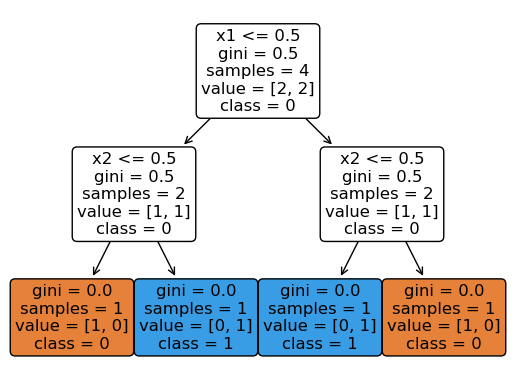

In [114]:
#Karar agacini gorsellestirmek için
from sklearn import tree
import matplotlib.pyplot as plt

tree.plot_tree(model2, filled = True, rounded = True, class_names = ['0','1'], feature_names = ['x1','x2'])
plt.show()

# 2. Karar sinirlari

## 2.a Veri seti olusturulmasi

Asagida `make_classification` fonksiyonu kullanilarak iki boyutlu bir veri seti olusturulmustur.

In [200]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [201]:
# `make_classification` fonksiyonu kullanilarak iki boyutlu bir veri seti olusturmak için öncelikle gerekli import islemlerini yapalim.
from sklearn import datasets
X, y = datasets.make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=0)
#n_samples: olusturulacak veri setinin satir sayisi
#n_features: olusturulacak veri setinin sutun sayisi
#n_redundant: bagimsiz degiskenler arasinda korelasyonu ifade eder. Varsayilan degeri 2'dir.
#n_informative: bagimsiz degiskenlerin hedef degiskeni etkileme sayisini ifade eder. Varsayilan degeri 2'dir.
#n_clusters_per_class: sinif basina düsünülen küme sayisini ifade eder. Varsayilan degeri 2'dir.
#random_state: veri setinin olusturulmasinda kullanilan rastgele sayi dizisini ifade eder. Varsayilan degeri 0'dir.

Sekildeki veri, karar agaci kullanilarak modellenmek istenmektedir.

### 2.b.I

Bu bir tasniflendirme problemi midir, yoksa regresyon problemi midir?

> Verilen bilgilere göre, make_classification fonksiyonu kullanılarak oluşturulan veri seti, X ile temsil edilen özellikler ve y ile temsil edilen hedef sınıflar içermektedir. Sınıfların oluşturulması için n_clusters_per_class=1 parametresi kullanıldığına göre, iki sınıfın olduğunu ve bu sınıfları ayırmak için bir karar ağacı modeli kullanılmak istendiğini söyleyebiliriz.

> Tasniflendirme problemlerinde, verilen özelliklerin bir sınıfa ait olup olmadığını veya hangi sınıfa ait olduğunu belirlemek amaçlanır. Bu durumda, karar ağacı modelini kullanarak verilen özellikleri kullanarak doğru sınıfları tahmin etmek istiyoruz. Dolayısıyla, bu senaryo bir sınıflandırma problemidir.

### 2.b.II

Herhangi bir kisitlamaya tabi tutmadan, uygun karar agaci modelini (tasniflendirme/regresyon) secerek karar agacinizi egitiniz.

In [184]:
#Herhangi bir kisitlamaya tabi tutmadan, uygun karar agaci modelini (tasniflendirme/regresyon) secerek karar agacini eğitelim
#öncelikle bu bir tasniflendirme problemi oldugu için `DecisionTreeClassifier` fonksiyonunu kullanacagiz.
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(X, y)

DecisionTreeClassifier()

### 2.b.III


Modelinizin kararlarini $x \in [-2, 4]$, $y \in [-4, 2]$ araliginda gorsellestiriniz.


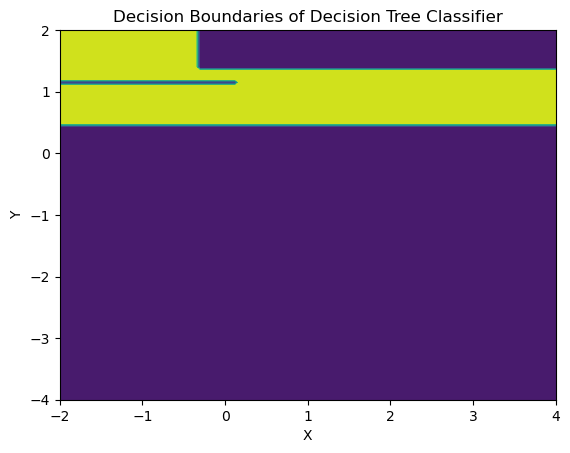

In [185]:
#Modelin kararlarini $x \in [-2, 4]$, $y \in [-4, 2]$ araliginda gorsellestirmek için
import numpy as np
#x ve y deger aralıklarını belirleyelim
a = np.linspace(-2, 4, 100)
b = np.linspace(-4, 2, 100)
#x ve y degerlerinden olusan bir koordinat dizisi olusturalim, bunu neden yapıyoruz çünkü karar agaci modeli tahminini yaparken bu koordinat dizisini kullanacagiz.
xx, yy =np.meshgrid(a, b)
#oluşturduğumuz xx ve yy değerlerini birleştirelim
X_grid = np.c_[xx.ravel(), yy.ravel()] #ravel fonksiyonu ile xx ve yy dizilerini tek boyutlu hale getirip, np.c_ ile birleştiriyoruz.
#X_grid'i kullanarak karar agaci modelinin tahminini yapalim
y_pred = model3.predict(X_grid)
#y_pred'i yeniden xx ve yy boyutuna getirmek gerekir ki, karar agaci modelinin tahminini görsellestirebilelim.boyutlar aynı olmalı çünkü.
Z = y_pred.reshape(xx.shape)

plt.contourf(xx, yy, Z)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Boundaries of Decision Tree Classifier')
plt.xlim(-2, 4)
plt.ylim(-4, 2)
plt.show()

## 2.c. Budama

Asagidaki sorulari, yukarida egitmis oldugunuz karar agacini baz alarak cevaplayiniz.

### 2.c.I

Karar agacinda kullanilabilecek budama tekniklerinden 3 tanesini yaziniz ve calisma prensiplerini kisaca aciklayiniz.

> Karar ağaçlarında kullanılan bazı budama teknikleri şunlardır:

- Gelişigüzel (Random) Budama:
Gelişigüzel budama, karar ağacının aşırı öğrenmeye eğilimini azaltmayı hedefleyen bir tekniktir. Bu yöntemde, ağaç büyütülürken belirli bir derinliğe kadar genişletilir, daha sonra gereksiz dallar rastgele olarak kesilir. Bu sayede, ağacın daha genelleyici hale gelmesi ve aşırı uyumdan kaçınması sağlanır.

- Kısıtlama (Pruning) Budama:
Kısıtlama budaması, ağacın büyüklüğünü kontrol etmek ve gereksiz dalları kaldırmak için kullanılan bir tekniktir. Bu yöntemde, ağaç tamamen büyütülür ve daha sonra dal veya düğümler tek tek çıkarılarak modellerin performansı değerlendirilir. Dalların çıkarılması, modele olan etkileri değerlendirilerek gerçekleştirilir. Modelin genel doğruluğunu artırmak ve gereksiz karmaşıklığı azaltmak için kullanılır.

- Cost-Complexity (Maliyet-Karmaşıklık) Budama:
Maliyet-karmaşıklık budaması, ağacın karmaşıklığı ile modelin doğruluğu arasındaki dengeyi bulmayı hedefler. Bu yöntemde, her bir düğümün karmaşıklık maliyeti hesaplanır ve bu maliyet değerlerine dayanarak en uygun budama noktaları belirlenir. Karmaşıklık maliyeti, bir düğümün doğruluk kazancı ve ağacın genel karmaşıklığı arasındaki dengenin bir ölçüsünü temsil eder. Düşük karmaşıklık maliyetine sahip düğümler, budama ile çıkarılabilir ve böylece ağaç daha basit ve genelleştirilebilir hale getirilebilir.

- Bu budama teknikleri, karar ağaçlarının aşırı öğrenmeye eğilimini azaltmak, modelin genelleme yeteneğini artırmak ve gereksiz karmaşıklığı önlemek için kullanılır. Her bir yöntem, farklı prensipler ve kriterler temelinde çalışırken, ortak amacı daha iyi bir karar ağacı modeli oluşturmaktır.

### 2.c.II

Maksimum derinligi `3` e kisitlayarak karar agacinizi tekrar egitiniz. Tahminlerinizi gorsellestiriniz.

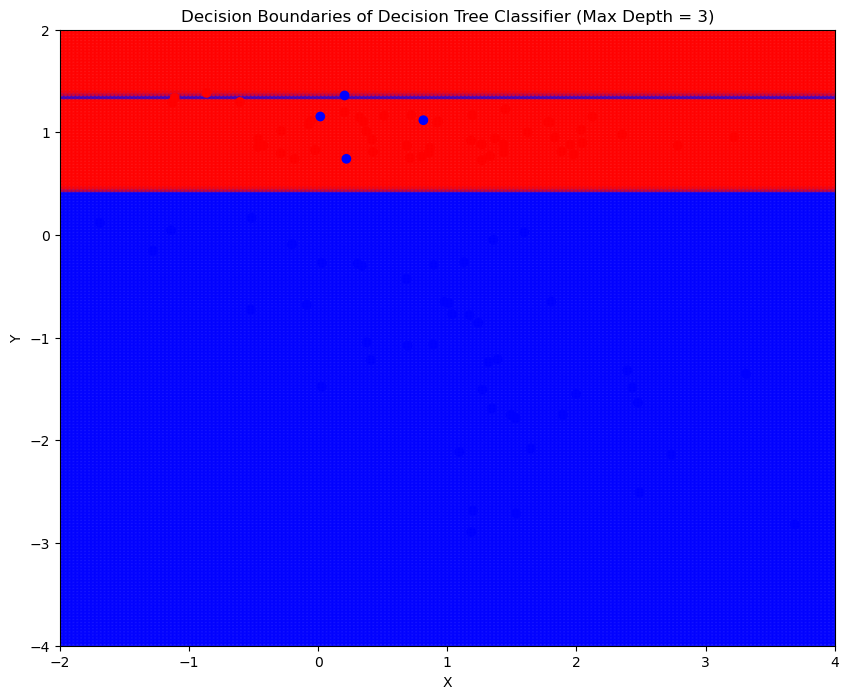

In [186]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# Karar ağacı modelini oluşturma ve eğitme (Maksimum derinlik = 3)
model4 = DecisionTreeClassifier(max_depth=3)
#max_depth parametresi karar agacinin maksimum derinligini ifade eder. Varsayilan degeri None'dir.maksimum derinlik demek karar ağacının dallanma sayısı demek.
model4.fit(X, y)

# Tahminleri hesaplama
x_values = np.linspace(-2, 4, 200)
y_values = np.linspace(-4, 2, 200)
xx, yy = np.meshgrid(x_values, y_values)
X_grid = np.c_[xx.ravel(), yy.ravel()]
predictions = model.predict(X_grid)

# Görselleştirme
plt.figure(figsize=(10, 8))
plt.scatter(X_grid[:, 0], X_grid[:, 1], c=predictions, cmap='bwr', alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Boundaries of Decision Tree Classifier (Max Depth = 3)')
plt.xlim(-2, 4)
plt.ylim(-4, 2)
plt.show()

### 2.c.III

Maksimum yaprak sayisini `6`'ya kisitlayarak karar agacinizi tekrar egitiniz. Tahminlerinizi gorsellestiriniz.

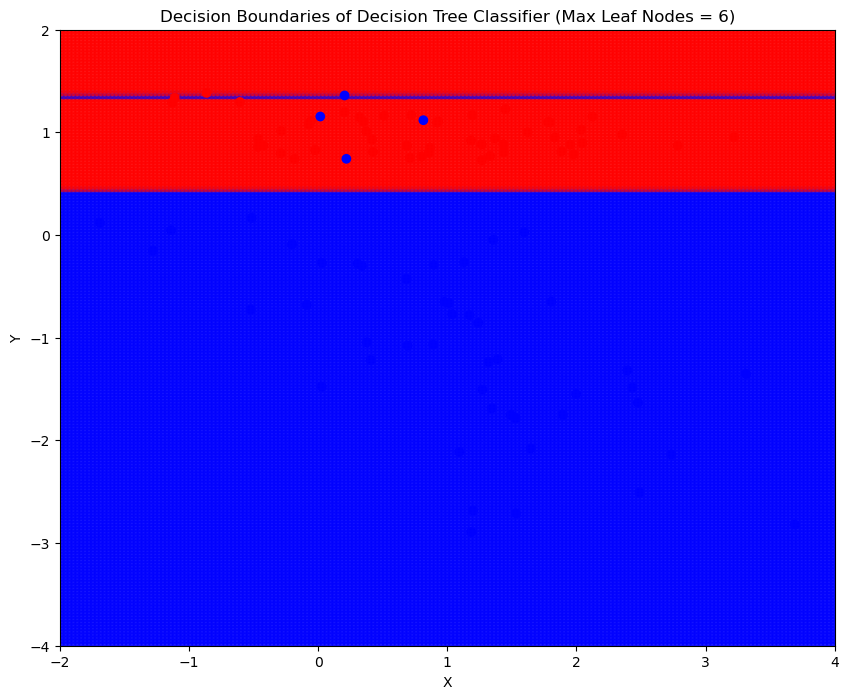

In [190]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# Karar ağacı modelini oluşturma ve eğitme (Maksimum yaprak sayısı = 6)
model5 = DecisionTreeClassifier(max_leaf_nodes=6)
model5.fit(X, y)

# Tahminleri hesaplama
x_value = np.linspace(-2, 4, 200)
y_value = np.linspace(-4, 2, 200)
xx, yy = np.meshgrid(x_value, y_value)
X_grid = np.c_[xx.ravel(), yy.ravel()]
prediction = model.predict(X_grid)

# Görselleştirme
plt.figure(figsize=(10, 8))
plt.scatter(X_grid[:, 0], X_grid[:, 1], c=prediction, cmap='bwr', alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Boundaries of Decision Tree Classifier (Max Leaf Nodes = 6)')
plt.xlim(-2, 4)
plt.ylim(-4, 2)
plt.show()

# 3. Parametre ayarlama

Ogrenilmeyip bastan secilmesi gereken parametrelerin optimizasyonu *(hyperparameter tuning)*, model egitiminin onemli bir parcasidir.

Bu kisimda `sklearn`'un `model_selection` modulunu kullanarak en iyi parametreleri arayacagiz ve bu asamada elde ettigimiz sonuclari gorsellestirecegiz.

## 3.a. Grid Search

`model_selection.GridSearchCV` sinifi, verilen parametrelerin tum kombinasyonlari ile modelin egitim ve degerlendirmesini gerceklestirip en iyi modeli secer.

Ornek bir uygulama:

Modelin ayarlanabilir parametreleri:

In [196]:
from sklearn import tree, model_selection
tree.DecisionTreeClassifier._get_param_names()

['ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'random_state',
 'splitter']

Parametre gridinin belirlenmesi:

In [198]:
parametre_gridi = {'max_depth':[2,3, None], 'min_samples_split':[2,3,4]}
#min_samples_split parametresi karar agacinin dallanmasi icin gereken minimum ornek sayisini ifade eder. Varsayilan degeri 2'dir.[2,3,4] ifadesi bu parametrenin alabilecegi degerleri ifade eder.
#max_depth parametresi karar agacinin maksimum derinligini ifade eder. Varsayilan degeri None'dir.[2,3, None] ifadesi bu parametrenin alabilecegi degerleri ifade eder.
parametre_gridi

{'max_depth': [2, 3, None], 'min_samples_split': [2, 3, 4]}

`GridSearchCV` nesnesinin olusumu:

In [203]:
gs = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), parametre_gridi, cv=10, return_train_score=True)
#GridSearchCV fonksiyonu, parametre_gridi icerisindeki parametrelerin olasi degerlerini deneyerek, en iyi parametre degerlerini bulmaya calisir.
#cv parametresi, veri setinin kac parcaya ayrilacagini ifade eder. Varsayilan degeri 5'tir.
#return_train_score parametresi True olarak ayarlanirsa, eğitim skorlarını da döndürür.

Aramanin icrasi:

In [204]:
gs.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, None],
                         'min_samples_split': [2, 3, 4]},
             return_train_score=True)

Sonuclar:

In [206]:
pd.DataFrame(gs.cv_results_)[['param_max_depth', 'param_min_samples_split', 'mean_train_score', 'mean_test_score']]

,param_max_depth,param_min_samples_split,mean_train_score,mean_test_score
0,2,2,0.960000,0.95
1,2,3,0.960000,0.95
2,2,4,0.960000,0.95
3,3,2,0.971111,0.92
4,3,3,0.967778,0.92
5,3,4,0.967778,0.92
6,None,2,1.000000,0.93
7,None,3,0.991111,0.91
8,None,4,0.978889,0.92


Arama sonucunda en iyi test skorunu veren model, tum veri uzerinde tekrar egitilir (ayri bir egitim sureci gerekmez).

`GridSearchCV` nesnesi tipki bir model nesnesi gibi davranir:

In [207]:
gs.score(X, y)

0.96

In [218]:
gs.predict([[2, 2]])

array([0])

### 3.a.I

`{'max_depth':[2,3,4,5,6,7,8,9,10,None], 'min_samples_split':[2,3,4,5,6,7,8,9,10]}` gridi icin GridSearchCV nesnesi kullanarak modeli degerlendiriniz.

Train ve test sonuclarini *heatmap* ile gorsellestiriniz.

c:\Users\kmara\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
c:\Users\kmara\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


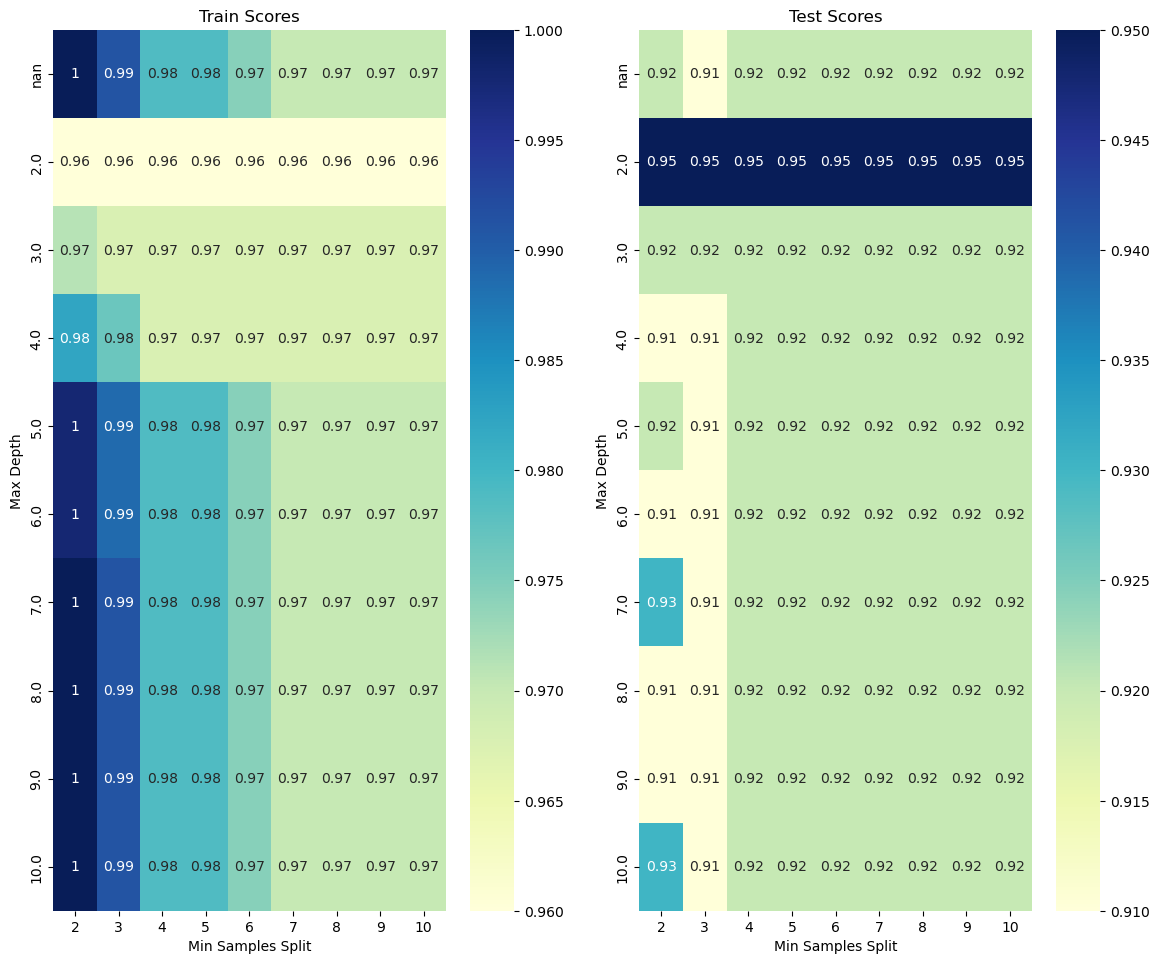

In [228]:
from sklearn import tree, model_selection
import pandas as pd
import seaborn as sns

# Karar ağacının ayarlanabilir parametreleri
parametre_gridi = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                   'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

# GridSearchCV nesnesinin oluşturulması
gs = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), parametre_gridi, cv=10, return_train_score=True)

# Modelin eğitilmesi ve değerlendirilmesi
gs.fit(X, y)

# Sonuçların DataFrame olarak saklanması
cv_results = pd.DataFrame(gs.cv_results_)

# Train ve test sonuçlarının heatmap olarak görselleştirilmesi
train_scores = cv_results.pivot(index='param_max_depth', columns='param_min_samples_split', values='mean_train_score')
test_scores = cv_results.pivot(index='param_max_depth', columns='param_min_samples_split', values='mean_test_score')

plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
sns.heatmap(train_scores, annot=True, cmap='YlGnBu', cbar=True)
#annot parametresi True olarak ayarlanirsa, her bir hucrenin degeri yazdirilir.
plt.title('Train Scores')
plt.xlabel('Min Samples Split')
plt.ylabel('Max Depth')

plt.subplot(1, 2, 2)
sns.heatmap(test_scores, annot=True, cmap='YlGnBu', cbar=True)
# 'YlGnBu' renk haritası, sarıdan maviye doğru giden bir renk geçişi sağlar.
# cbar parametresi True olarak ayarlanirsa, renk skalasi gosterilir.
plt.title('Test Scores')
plt.xlabel('Min Samples Split')
plt.ylabel('Max Depth')

plt.tight_layout(pad=2)
# tight_layout fonksiyonu, grafikler arasindaki bosluklari ayarlar.
plt.show()

- Bu kodda, GridSearchCV sınıfı kullanılarak karar ağacı modelinin en iyi parametre kombinasyonunu bulmak için eğitim ve değerlendirme işlemi gerçekleştirilir. Parametre gridi olarak {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]} kullanılır.

- Sonuçlar cv_results DataFrame'inde saklanır. Train ve test sonuçları, pivot işlemi ile heatmap olarak görselleştirilir. Heatmap, parametre kombinasyonlarının train ve test skorlarını renkli bir şekilde gösterir. Anotasyonlar, skor değerlerini gösterir.

- Sonuç olarak, train ve test sonuçlarını gösteren bir heatmap oluşturulur ve en iyi parametre kombinasyonu belirlenir.

### 3.a.II

Hazirlamis oldugunuz gorselin sonucunu degerlendiriniz.

- Egitim skoru hangi yonlerde artmaktadir? Neden?
- Test skoru nasil bir patern izlemektedir? Sabit bir artis yonu var midir?

- Hazırladığımız görsel, karar ağacının farklı max_depth (maksimum derinlik) ve min_samples_split (minimum örnekleme bölme) parametreleri kombinasyonlarına göre eğitim ve test skorlarını göstermektedir. Görseli kullanarak aşağıdaki değerlendirmeleri yapabiliriz:

- Eğitim skoru, genellikle max_depth arttıkça ve min_samples_split azaldıkça artmaktadır. Bu durum, daha derin ağaçların ve daha küçük bölme kriterlerinin verilere daha iyi uyması ve daha fazla ayrıntı yakalaması nedeniyle olabilir. Daha fazla derinlik veya daha küçük örnekleme bölme ile model, eğitim verilerine daha fazla uyma yeteneği kazanır ve bu da eğitim skorunun artmasına yol açar.

- Test skoru, max_depth ve min_samples_split parametreleri değiştikçe farklı bir desen izlemektedir. Bu durum, overfitting (aşırı uyum) veya underfitting (yetersiz uyum) olgusunu gösterebilir. Örneğin, max_depth değeri arttıkça, başlangıçta test skoru artar çünkü model daha fazla ayrıntıyı yakalar ve eğitim verilerine daha iyi uyar. Ancak, belirli bir noktadan sonra, model aşırı uyum yapmaya başlar ve test verilerine uyma yeteneği azalır, bu da test skorunda bir düşüşe neden olur. Benzer şekilde, min_samples_split azaldıkça, model daha fazla bölme yapar ve eğitim verilerine daha fazla uyar, ancak aşırı uyum yapma eğilimi artar ve test skorunda düşüş görülür.

Bu değerlendirmeler, karar ağacı modelinin aşırı uyum veya yetersiz uyum olgusunu kontrol etmek için max_depth ve min_samples_split gibi parametreleri doğru şekilde ayarlamanın önemini vurgulamaktadır. Optimal parametre değerleri, modelin genel performansını en iyi şekilde dengeleyen noktayı bulmak için dikkatli bir değerlendirme ve model seçimi süreci gerektirir.

In [230]:
#min_samples_split nedir ?
#min_samples_split parametresi karar agacinin dallanmasi icin gereken minimum ornek sayisini ifade eder. Varsayilan degeri 2'dir.